In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


In [61]:
# read in crypocurrency dataset
file = os.path.join("crypto_data.csv")

df = pd.read_csv(file)

df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [63]:
# keep only traded cryptos
df = df[df.IsTrading == True]

# drop unneccesary 'IsTrading' column
df.drop('IsTrading', axis=1, inplace=True)

df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   ProofType        1144 non-null   object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  1144 non-null   object 
dtypes: float64(1), object(5)
memory usage: 62.6+ KB


In [65]:
# drop rows with null values
df.dropna(inplace=True)

df.isnull().sum().sum()

0

In [66]:
# filter out coins that have not been mined
df = df[df.TotalCoinsMined > 0]

# drop coin name and Trading symbol columns to prep for ML algorithm
df_dropped_names = df.drop(['Unnamed: 0', 'CoinName'], axis = 1)

df_dropped_names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


In [67]:
# convert Total Coin Supply to float value
df_dropped_names['TotalCoinSupply'] = df_dropped_names['TotalCoinSupply'].apply(lambda x: float(x))

df_dropped_names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(2)
memory usage: 20.8+ KB


In [68]:
# convert categorical data to numeric indicators for PCA analysis later
df_dummies = pd.get_dummies(df_dropped_names)

df_dummies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 98 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TotalCoinsMined                   532 non-null    float64
 1   TotalCoinSupply                   532 non-null    float64
 2   Algorithm_1GB AES Pattern Search  532 non-null    uint8  
 3   Algorithm_536                     532 non-null    uint8  
 4   Algorithm_Argon2d                 532 non-null    uint8  
 5   Algorithm_BLAKE256                532 non-null    uint8  
 6   Algorithm_Blake                   532 non-null    uint8  
 7   Algorithm_Blake2S                 532 non-null    uint8  
 8   Algorithm_Blake2b                 532 non-null    uint8  
 9   Algorithm_C11                     532 non-null    uint8  
 10  Algorithm_Cloverhash              532 non-null    uint8  
 11  Algorithm_Counterparty            532 non-null    uint8  
 12  Algorit

In [93]:
# Standardize the dataset

# initialize scaler
scaler = StandardScaler()

# fit it to dataset
scaler.fit(df_dummies)

# scale dataset
X_scaled = scaler.fit_transform(df_dummies)

X_scaled[:1]

array([[-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
        -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
        -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
        -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
        -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
        -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
        -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
        -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
        -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.39879994, -0.0433963 , -0.1

In [85]:
len(X_scaled[:1][0])

98

## PCA reduction

In [94]:
# PCA analysis

# initialize PCA
pca = PCA(n_components=0.90)

crypto_pca = pca.fit_transform(X_scaled)

df_crypto_pca = pd.DataFrame(crypto_pca)

df_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-1.542637e-14,-1.165476e-11,1.940305e-14,-0.007129,-1.319756,-0.051813,...,6.791870e-16,3.244575e-16,-1.011010e-15,-2.982695e-15,-1.731974e-15,5.284002e-15,-1.924284e-15,3.781938e-15,-4.015154e-16,2.426681e-16
1,-0.318434,1.032331,-0.591126,0.001386,-1.526824e-14,-1.155975e-11,1.957805e-14,-0.007739,-1.322514,-0.056674,...,-4.586593e-16,9.072591e-16,-2.269850e-15,-2.263852e-15,-2.660612e-15,7.651009e-15,-1.525656e-15,3.355866e-15,-5.762231e-16,5.071767e-18
2,2.305468,1.656383,-0.683617,0.004731,-1.478301e-14,-3.949449e-11,3.759289e-14,-0.054781,-1.542879,-0.943951,...,1.780031e-14,-4.989842e-14,4.825798e-14,3.187038e-14,3.098898e-14,-9.932864e-14,-3.553773e-14,-7.367435e-14,3.182511e-14,-1.967865e-14
3,-0.145184,-1.320593,0.192813,-0.001229,3.751275e-15,1.025361e-11,-9.093496e-15,-0.002071,0.281463,0.251862,...,1.280944e-15,-1.279970e-15,8.288230e-15,2.691578e-15,-4.122980e-15,-1.425553e-14,-3.198069e-15,-1.367220e-14,6.083623e-15,-1.688258e-14
4,-0.151768,-2.036192,0.396182,-0.001705,1.616118e-14,1.423168e-11,-1.198958e-14,0.027735,0.519099,0.188820,...,-6.092554e-16,1.358936e-14,7.275832e-14,-8.776375e-14,-7.938475e-14,-6.460819e-14,3.930429e-14,-7.474587e-14,1.316774e-13,-2.987009e-13



PCA reduction decreased the number of features from 98 to 74 to preserve 90% explained variance

In [87]:
# t-SNE reduction to visualize the clustering

# initialize t-sne
tsne = TSNE(learning_rate=250)

tsne_features = tsne.fit_transform(df_crypto_pca)

In [88]:
# checking features are reduced to 2
tsne_features.shape

(532, 2)

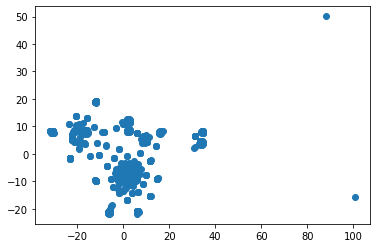

In [89]:
# plotting tsne reduction features
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

The previous t-SNE reduction has created approximately two clusters with two outliers that consistently show up.

## K-Means Clustering

In [95]:
# find the best k-value that will optimize the inertia at the elbow of the Inertia vs. K curve

inertia = []
k = list(range(1,10))

# loop through k values and save inertia for each one
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)
    
elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()


,k,inertia
0,1,46979.075160
1,2,45721.623608
2,3,44654.846002
3,4,43684.795459
4,5,43050.187963


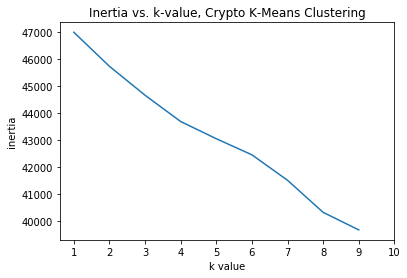

In [96]:
# plotting elbow curve data
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('k value')
plt.ylabel('inertia')
plt.title('Inertia vs. k-value, Crypto K-Means Clustering')
plt.show()

Inertia plot indicates that between k = 2 and k = 3 the elbow occurs. 

In [97]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [98]:
clusters = get_clusters(3, df_crypto_pca)

clusters

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,class
0,-0.335099,1.032189,-0.590713,0.001397,-1.542637e-14,-1.165476e-11,1.940305e-14,-0.007129,-1.319756,-0.051813,...,3.244575e-16,-1.011010e-15,-2.982695e-15,-1.731974e-15,5.284002e-15,-1.924284e-15,3.781938e-15,-4.015154e-16,2.426681e-16,0
1,-0.318434,1.032331,-0.591126,0.001386,-1.526824e-14,-1.155975e-11,1.957805e-14,-0.007739,-1.322514,-0.056674,...,9.072591e-16,-2.269850e-15,-2.263852e-15,-2.660612e-15,7.651009e-15,-1.525656e-15,3.355866e-15,-5.762231e-16,5.071767e-18,0
2,2.305468,1.656383,-0.683617,0.004731,-1.478301e-14,-3.949449e-11,3.759289e-14,-0.054781,-1.542879,-0.943951,...,-4.989842e-14,4.825798e-14,3.187038e-14,3.098898e-14,-9.932864e-14,-3.553773e-14,-7.367435e-14,3.182511e-14,-1.967865e-14,0
3,-0.145184,-1.320593,0.192813,-0.001229,3.751275e-15,1.025361e-11,-9.093496e-15,-0.002071,0.281463,0.251862,...,-1.279970e-15,8.288230e-15,2.691578e-15,-4.122980e-15,-1.425553e-14,-3.198069e-15,-1.367220e-14,6.083623e-15,-1.688258e-14,0
4,-0.151768,-2.036192,0.396182,-0.001705,1.616118e-14,1.423168e-11,-1.198958e-14,0.027735,0.519099,0.188820,...,1.358936e-14,7.275832e-14,-8.776375e-14,-7.938475e-14,-6.460819e-14,3.930429e-14,-7.474587e-14,1.316774e-13,-2.987009e-13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,1.623380e-14,6.872581e-11,5.141389e-14,-0.851713,2.041159,3.560713,...,-1.449422e-15,9.911619e-15,4.436272e-15,-6.710247e-15,-1.345905e-14,-4.241955e-15,-1.685543e-14,7.950476e-15,-1.935251e-14,0
528,-0.333144,1.032071,-0.590740,0.001399,-1.532967e-14,-1.167422e-11,1.945274e-14,-0.007154,-1.320125,-0.052460,...,5.301800e-16,-1.290781e-15,-3.016578e-15,-1.997892e-15,5.775262e-15,-1.613871e-15,3.598621e-15,-3.561618e-16,3.229973e-16,0
529,0.324349,-2.312308,0.421515,-0.001319,8.990310e-15,1.100148e-11,-1.472614e-14,0.017309,0.161077,-0.047787,...,2.667585e-14,1.800770e-14,-1.422684e-14,-1.584466e-15,-3.028768e-14,-5.129730e-15,-1.989494e-14,3.429631e-14,-6.676998e-14,0
530,-0.149364,-2.049336,0.412968,-0.001745,8.560997e-15,1.455604e-11,-1.932594e-14,0.028954,0.544389,0.233373,...,-1.584814e-15,-3.069177e-15,-1.038013e-15,1.530849e-16,7.096728e-16,-2.087867e-15,1.030302e-15,2.194970e-15,-6.636283e-16,0


In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    clusters,
    x="principal component 3",
    y="principal component 2",
    z="principal component 1",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [99]:
inertia = []
k = list(range(1,10))

# loop through k values and save inertia for each one
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)
    
elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,205130.453125
1,2,116286.625000
2,3,66917.875000
3,4,38014.613281
4,5,30636.246094


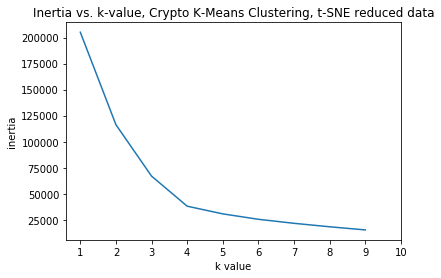

In [100]:
# plotting elbow curve data
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('k value')
plt.ylabel('inertia')
plt.title('Inertia vs. k-value, Crypto K-Means Clustering, t-SNE reduced data')
plt.show()

In [101]:
df_crypto_tsne = pd.DataFrame(tsne_features, columns=['Feature 1', 'Feature 2'])


clusters_tsne = get_clusters(4, df_crypto_tsne)

clusters_tsne

,Feature 1,Feature 2,class
0,-15.419648,7.857312,1
1,-21.021294,4.233133,1
2,-29.915327,7.626609,1
3,34.021797,4.025881,3
4,11.686894,-15.401740,2
...,...,...,...
527,31.168259,2.554104,3
528,-21.605083,7.655594,1
529,-6.526526,-21.069721,2
530,6.284078,-20.668119,2


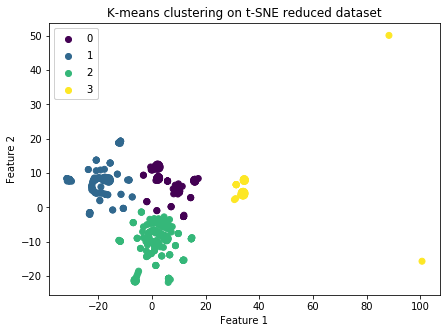

In [123]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

scatter = ax.scatter(x=clusters_tsne['Feature 1'], y=clusters_tsne['Feature 2'], c=clusters_tsne['class'])

legend = ax.legend(*scatter.legend_elements(), loc='upper left')

ax.add_artist(legend)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means clustering on t-SNE reduced dataset')

plt.show()

In [124]:
df_crypto_tsne_clusted = pd.merge(df, clusters_tsne['class'], left_index=True, right_index=True)

df_crypto_tsne_clusted.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,class
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42,1
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000,1
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359,2
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000,2
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0,2


In [125]:
df_crypto_tsne_clusted[df_crypto_tsne_clusted['class'] == 3]

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,class
12,ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000,3
13,ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000,3
37,ARG,Argentum,Scrypt,PoW,1.220580e+07,64000000,3
62,CBX,CryptoBullion,Scrypt,PoW/PoS,1.039117e+06,1000000,3
80,DVC,DevCoin,SHA-256,PoW,1.877386e+10,21000000000,3
84,EMC2,Einsteinium,Scrypt,PoW,2.188719e+08,299792458,3
85,EMD,Emerald,Scrypt,PoW,1.949679e+07,32000000,3
95,FRK,Franko,Scrypt,PoW,1.142732e+06,11235813,3
124,LTB,Litebar,Scrypt,PoW,1.104344e+06,1350000,3
130,MEC,MegaCoin,Scrypt,PoW,3.815200e+07,42000000,3
